In [25]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score

In [27]:
def model_evaluation(y_test, y_pred) :
    print('Trained Model Test Data Accuracy Score :',accuracy_score(y_test, y_pred)*100)
    testacc=accuracy_score(y_test, y_pred)
    testrecall=recall_score(y_test, y_pred)
    testprecision=precision_score(y_test, y_pred)
    print(' ')
    print(classification_report(y_test, y_pred))
    return testacc, testrecall, testprecision

In [29]:
def train_dummy_classifier(X_train, y_train, X_test, y_test):
    dummy_clf = DummyClassifier(strategy="stratified")
    dummy_clf.fit(X_train, y_train)
    y_pred = dummy_clf.predict(X_test)
    testacc, testrecall, testprecision = model_evaluation(y_test, y_pred)
    return dummy_clf, testacc, testrecall, testprecision

In [31]:
def train_knn_classifier(X_train, y_train, X_test, y_test, k = 15):
    classifier = KNeighborsClassifier(n_neighbors=k)  
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    testacc, testrecall, testprecision = model_evaluation(y_test, y_pred)
    return classifier, testacc, testrecall, testprecision

In [33]:
def extract_X_Y(df) :
    X = df [["x", "y"]].values
    Y = df ["result"].values
    return X, Y

In [35]:
def batch_model_steps(file_path1, file_path2):
    df1 = pd.read_csv(file_path1)
    df2 = pd.read_csv(file_path2)
    results = {}
    X, Y = extract_X_Y(df1)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40)
    # stage 1 Dummy classifier
    dummy_clf, testacc, testrecall, testprecision = train_dummy_classifier(X_train, y_train, X_test, y_test)
    results["DummyClassifier"] = {"accuracy" : testacc, "recall" : testrecall, "precision" : testprecision}
    #stage 2 Training KNN classifier
    X_train_train, X_test_eval, y_train_train, y_test_eval = train_test_split(X_train, y_train, test_size=0.40)
    classifier, testacc, testrecall, testprecision = train_knn_classifier(X_train_train, y_train_train, X_test_eval, y_test_eval)
    results["KNNClassifier"] = {"accuracy" : testacc, "recall" : testrecall, "precision" : testprecision}

    # stage 3 Prediction
    y_pred = classifier.predict(X_test)
    testacc, testrecall, testprecision = model_evaluation(y_test, y_pred)
    results["KNNClassifierPredicition"] = {"accuracy" : testacc, "recall" : testrecall, "precision" : testprecision}

    # stage 4 Retraining KNN classifier
    X, Y = extract_X_Y(df2)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40)
    X_train_train, X_test_eval, y_train_train, y_test_eval = train_test_split(X_train, y_train, test_size=0.40)
    classifier, testacc, testrecall, testprecision = train_knn_classifier(X_train_train, y_train_train, X_test_eval, y_test_eval)
    results["KNNClassifierRetrained"] = {"accuracy" : testacc, "recall" : testrecall, "precision" : testprecision}

    # stage 5 Prediciton of retrained KNN classifier
    y_pred = classifier.predict(X_test)
    testacc, testrecall, testprecision = model_evaluation(y_test, y_pred)
    results["KNNClassifierRetrainedPredicition"] = {"accuracy" : testacc, "recall" : testrecall, "precision" : testprecision}

    return results

In [41]:
def construct_results_df(results):
    data = []
    for key, value in results.items():
        value["stage_name"] = key
        data.append(value)
    df = pd.DataFrame(data)
    return df

In [65]:
def plot_graph(results_df):
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(results_df["stage_name"], results_df["accuracy"], marker='o', label='Accuracy', linewidth=2)
    plt.plot(results_df["stage_name"], results_df["recall"], marker='o', label='Recall', linewidth=2)
    plt.plot(results_df["stage_name"], results_df["precision"], marker='o', label='Precision', linewidth=2)
    
    # Graph formatting
    plt.title("Batch Model Performance Metrics Across Steps")
    plt.xlabel("Steps")
    plt.ylabel("Metric Value")
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=30) 
    plt.tight_layout()
    plt.show()

In [59]:
path1 = "first.csv"
path2 = "second.csv"
results = batch_model_steps(path1, path2)
result_df = construct_results_df(results)

Trained Model Test Data Accuracy Score : 48.75
 
              precision    recall  f1-score   support

       False       0.49      0.49      0.49       200
        True       0.49      0.48      0.49       200

    accuracy                           0.49       400
   macro avg       0.49      0.49      0.49       400
weighted avg       0.49      0.49      0.49       400

Trained Model Test Data Accuracy Score : 89.58333333333334
 
              precision    recall  f1-score   support

       False       0.92      0.87      0.89       119
        True       0.88      0.93      0.90       121

    accuracy                           0.90       240
   macro avg       0.90      0.90      0.90       240
weighted avg       0.90      0.90      0.90       240

Trained Model Test Data Accuracy Score : 88.0
 
              precision    recall  f1-score   support

       False       0.92      0.83      0.87       200
        True       0.85      0.93      0.89       200

    accuracy            

In [61]:
result_df

,accuracy,recall,precision,stage_name
0,0.487500,0.485000,0.487437,DummyClassifier
1,0.895833,0.925620,0.875000,KNNClassifier
2,0.880000,0.925000,0.848624,KNNClassifierPredicition
3,0.883333,0.896552,0.866667,KNNClassifierRetrained
4,0.902500,0.916667,0.894737,KNNClassifierRetrainedPredicition


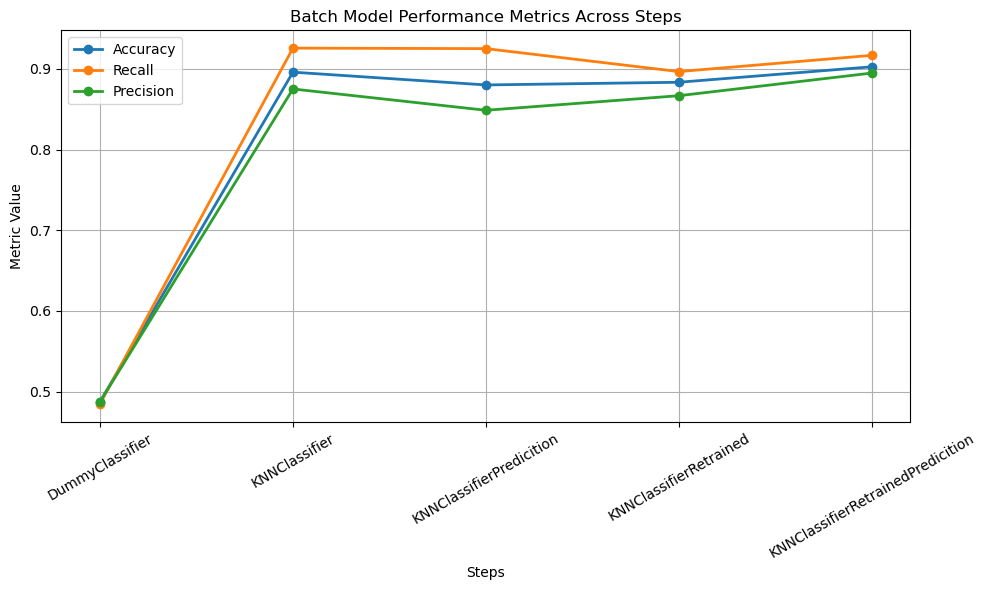

In [67]:
plot_graph(result_df)